# 1. Estatística Básica

## 1.1 Tipos de variáveis

- **Variável qualitativa** 
    - *Nominal*: Valores que expressam atributos sem nenhum tipo de ordem. Ex: sexo, estado civil, país de origem
    - *Ordinal*: Valores que expressam atributos, porém com algum tipo de ordem ou grau. Ex: escolaridade, resposta de um paciente (piora, igual, melhora), classe social (alta, média, baixa)

- **Variável quantitativa** 
    - *Discreta*: Valores que expressam atributos nos valores inteiros. Ex: idade, número de banheiros, número de filhos.
    - *Contínua* : Valores que expressam atributos nos valores reais. Ex: Salário, temperatura

## 1.2 Estatística descritiva

Etapa inicial da análise das features de um conjunto de dados, com o objetivo de tirar informações prévias do mesmo. Quando possuímos grande volume de dados, precisamos de valores representativos que resumam nosso conjuto de dados.

### 1.2.1 Medidas de posição
Um passo básico na exploração dos dados é encontrar um valor típico de cada feature: uma estimativa de onde a maior parte dos dados está localizada. Usualmente, emprega-se uma das seguintes medidas de posição (ou localização) central: média, mediana ou moda.

1.2.1.1 Média

Seja $X$ uma variável quantitativa e $x_i$, tal que $i=1,...,n$, os valores assumidos por X. Define-se média de $\overline{x}$ como sendo :


$$\overline{x} = \frac{\sum_{i=1}^{n}x_i}{n}= \frac{x_1+ x_2 + x_3 +... +x_n}{n}$$

In [14]:
import numpy as np
from scipy import stats

alturas = [1.62, 1.70, 1.72, 1.68, 1.70, 1.62, 1.70, 4.0]

media = np.mean(alturas)

print(f'Média das alturas: {media:.2f}')

Média das alturas: 1.97


1.2.1.2 Mediana

Consideremos, agora, as observações ordenadas em ordem crescente. Vamos denotar a menor observação por $x^{(1)}$, a segunda por $x^{(2)}$, e assim por diante, obtendo-se


$$x^{(1)} \leq x^{(2)} \leq \dots \leq x^{(n)}$$

Com esta notação, a mediana da variável $X$ pode ser definida como

$md(X)= x^{\left(\frac{n+1}{2}\right)}\mbox{ (se n é ímpar)}$

ou

$md(X)= x^{\left(\frac{n}{2}\right)}+ x^{\left(\frac{n}{2}+1\right)}\mbox{ (se n é par)}$

In [16]:
print(f'Alturas ordenadas: {np.sort(alturas)}')

Alturas ordenadas: [1.62 1.62 1.68 1.7  1.7  1.7  1.72 4.  ]


In [15]:
mediana = np.median(alturas)
print(f'Mediana das alturas: {mediana:.2f}')

Mediana das alturas: 1.70


1.2.1.3 Moda

A moda é o valor que ocorre com mais frequência em uma feature de um conjunto de dados. Ela pode não existir, quando nenhum valor se repete); ser unimodal, quando existe apenas um valor com maior frequência; e também ser multimodal, quando mais de um valor possui a maior frequência.

In [5]:
moda = stats.mode(alturas)
print(f'A altura {moda[0][0]:.2f} é a moda e apareceu em {moda[1][0]} amostras.')

A altura 1.70 é a moda e apareceu em 3 amostras.


Vimos a moda para uma variável quantitativa. Podemos ter a moda de uma variável qualitativa?

In [7]:
cores = ['amarelo', 'vermelho', 'Amarelo','verde', 'verde', 
         'amarelo', 'vermelho', 'aMarelo']
moda = stats.mode(cores)
moda
#print(f'A cor {moda[0][0]} é a cor da moda e apareceu em {moda[1][0]} amostras.')

ModeResult(mode=array(['amarelo'], dtype='<U8'), count=array([2]))

### Exercício

O dataset contido em state.csv contém a população e a taxa de homicídios (em unidades de homicídios por 100.000 pessoas em um ano) para cada estado. Agora que já aprendemos sobre a média, a mediana e a moda. Vamos verificar essas medidas neste dataset.

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mean.html
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.median.html
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mode.html

In [8]:
import pandas as pd

state = pd.read_csv('state.csv')

state.head()

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA


In [9]:
state.mean(numeric_only=True)

Population     6162876.300
Murder.Rate          4.066
dtype: float64

In [11]:
state.median(numeric_only=True)

Population     4436369.5
Murder.Rate          4.0
dtype: float64

In [13]:
state['Murder.Rate'].mode()

0    1.6
1    2.0
2    5.7
dtype: float64

Qual conclusão podemos tirar desses resultados? A média é uma boa medida para representar a feature Population? Por quê?

### 1.2.2 Medidas de variabilidade

O resumo de um conjunto de dados por uma única medida representativa de posição central esconde toda a informação sobre a variabilidade do conjunto de observações. As medidas de variabilidade, ou de dispersão, acrescentam maiores informações sobre os dados ao medir se os valores são bem agrupados ou mais espalhados. Assim como existem diferentes medidas de dispersão, existem também diferentes formas de medir a variabilidade.  

1.2.2.1 Variância

As métricas de dispersão mais utilizadas são baseadas nas diferenças, ou desvios, entre os dados observados e a medida de posição.

In [17]:
lista = [1,4,4]
media = np.mean(lista)

desvios = [n - media for n in  lista]

print(f'Os desvios são: {desvios}')

Os desvios são: [-2.0, 1.0, 1.0]


Estes desvios nos dizem o quão dispersos os dados são em relação ao valor central. Uma forma de medir a variabilidade é estimar um valor típico destes desvios. A **variância** é uma medida bem conhecida que é calculada por meio da média dos desvios ao quadrado.

$$s^2 = \frac{\sum_{i=1}^{n}(x_i - \overline{x})^2}{n}$$

In [21]:
#Cuidado: O indíce em python começa com o zero
variancia = np.sum([((n - media)**2)/(len(lista)) for n in  lista])
variancia

1.9999999999999998

In [66]:
np.var(lista)

2.0

Além da variância, temos também o **desvio padrão** que é igual a raiz quadrada da variância e a **amplitude** que é a diferença entre o maior e o menor valor observado. Esta medida de variabilidade é fortemente influenciada por valores extremos nas observações, como outliers. 

**Variância: vídeo explicando pq se divide por 'n-1' em variância amostral:**
https://pt.khanacademy.org/math/ap-statistics/summarizing-quantitative-data-ap/more-standard-deviation/v/another-simulation-giving-evidence-that-n-1-gives-us-an-unbiased-estimate-of-variance

1.2.2.2 Quartis

Vimos que a mediana é um valor que deixa metade dos dados abaixo dela e metade acima. Ela também é conhecida como o segundo quartil. Além dela, existem também o primeiro e o terceiro quartil, onde:

* $Q_1$ - 1º quartil (25º percentil) - 25% das observações são menores do que esse valor
* $Q_2$ - 2º quartil (50º percentil) - 50% das observações são menores do que esse valor
* $Q_3$ - 3º quartil (75º percentil) - 75% das observações são menores do que esse valor

In [18]:
state.quantile([0.25,0.5,0.75])

,Population,Murder.Rate
0.25,1833004.25,2.425
0.50,4436369.50,4.000
0.75,6680312.25,5.550


Uma medida comum de variabilidade é a chamada amplitude interquartil (ou Interquartile Range), que é dada por
$$ IQR = Q_3 - Q_1$$

### Exercício

Calcule a variância e a amplitude interquartil das features do dataset state.csv.

Dicas: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.var.html
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.quantile.html

In [71]:
state.var(numeric_only=True)

Population     4.689833e+13
Murder.Rate    3.670045e+00
dtype: float64

In [73]:
q3 = state.quantile(0.75)
q1 = state.quantile(0.25)
IQR = q3 - q1
print('As amplitudes interquartil das features são iguais a:')
print(IQR)

As amplitudes interquartil das features são iguais a:
Population     4847308.000
Murder.Rate          3.125
dtype: float64


"Tradicionalmente, uma análise descritiva de dados limita-se a calcular algumas medidas de posição e variabilidade, como a média e variância, por exemplo. Contrária a essa tendência, uma corrente mais moderna, liderada por Tukey (1977), utiliza principalmente técnicas gráficas, em oposição a resumos numéricos. Isso não significa que sumários não devam ser obtidos, mas uma análise exploratória de dados não deve se limitar a calcular tais medidas." (Bussab e Morettin, 2010)

## 1.3 BOXPLOT

O boxplot é um gráfico utilizado para avaliar a distribuição empírica do dados. O boxplot é formado pelo primeiro e terceiro quartil, além da mediana. As hastes inferiores e superiores se estendem, respectivamente, do quartil inferior até o menor valor não inferior ao limite inferior e do quartil superior até o maior valor não superior ao limite superior. Os limites são calculados da forma abaixo

* Limite inferior: $\max\{\min(\text{dados});Q_1-1,5(Q_3-Q_1)\}$.
- Limite superior: $\min\{\max(\text{dados});Q_3+1,5(Q_3-Q_1)\}$.

Para este caso, os pontos fora destes limites são considerados valores discrepantes (outliers) e são denotados por asterisco (*). A Figura  a seguir apresenta um exemplo do formato de um boxplot.

<center><img src="https://miro.medium.com/max/609/1*r41SQj0LbdCV6rWoIos6mA.png" width="700" height="700" /></center>

O boxplot pode ainda ser utilizado para uma comparação visual entre dois ou mais grupos. Por exemplo, duas ou mais caixas são colocadas lado a lado e se compara a variabilidade entre elas, a mediana e assim por diante. Outro ponto importante é a possibilidade da observação da amplitude interquartil \\( (Q_3 - Q_1) \\).

<AxesSubplot:ylabel='Murder.Rate'>

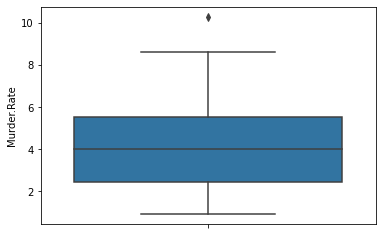

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=state, y='Murder.Rate')

In [23]:
state['Murder.Rate'].max()

10.3

## 1.4 Tabela de Frequência e Histograma

A tabela de frequência de uma variável divide os dados desta variável em segmentos igualmente espaçados e nos diz quantos valores pertencem a cada segmento. No caso abaixo, a feature 'Population' foi dividida em 10 segmentos. A tabela de frequência exibe os ranges e a contagem de estados que pertencem a cada segmento.


In [104]:
data=state['Population'].value_counts(bins = 10).sort_index().reset_index()
df = pd.DataFrame(data=data).rename(columns={'index':'range','Population':'count'})
df.head(11)

,range,count
0,"(526935.669, 4232659.0]",24
1,"(4232659.0, 7901692.0]",14
2,"(7901692.0, 11570725.0]",6
3,"(11570725.0, 15239758.0]",2
4,"(15239758.0, 18908791.0]",1
5,"(18908791.0, 22577824.0]",1
6,"(22577824.0, 26246857.0]",1
7,"(26246857.0, 29915890.0]",0
8,"(29915890.0, 33584923.0]",0
9,"(33584923.0, 37253956.0]",1


Um **histograma** é uma forma de visualizar uma tabela de frequências, com os bins no eixo X e a contagem de dados no eixo Y.

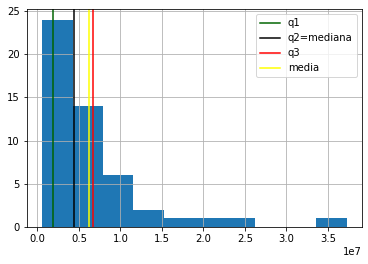

In [124]:
q1 = state['Population'].quantile(0.25)
q2 = state['Population'].quantile(0.5)
q3 = state['Population'].quantile(0.75)
media = state['Population'].mean()

state['Population'].hist(bins=10)

# plotando a mediana e os quartis
plt.axvline(q1,color="darkgreen", label="q1")
plt.axvline(q2, color="black", label="q2=mediana")
plt.axvline(q3, color="red", label="q3")
plt.axvline(media, color="yellow", label="media")
plt.legend()
plt.show()

## 1.5 Assimetria

É o **grau de desvio ou afastamento** da **simetria** de uma distribuição. Quando a curva é simétrica, a `média`, a `mediana` e a `moda` coincidem, num mesmo ponto, havendo um perfeito equilíbrio na distribuição. Um exemplo de distribuição simétrica é a **distribuição normal**. Quando o equilíbrio não acontece, a média, a mediana e a moda recaem em pontos diferentes da distribuição, e a distribuição se torna **assimétrica**:


<img src="https://www.researchgate.net/profile/Marco_Faria/publication/294890337/figure/fig5/AS:668873900716049@1536483373457/a-Negative-skewness-b-Normal-curve-c-Positive-skewness-Durkhure-and-Lodwal-2014.ppm" width=600>


- Distribuição assimétrica **Negativa ou enviesada a esquerda**: quando os valores se concentram na extremidade superior da escala e se distribuem gradativamente em direção à extremidade inferior.

- Distribuição assimétrica **Positiva ou enviesada a direita**: quando os valores se concentram na extremidade inferior da escala e se distribuem gradativamente em direção à extremidade superior.

A medidade de assimetria é conhecida como **skewness**, sendo calculada como:

$$ s(X) = \frac{1}{\sigma^3}\sum_{i=1}^{n}\frac{(x_i-\overline{x})^{3}}{n}$$

O valor da skewness nos indica a assimetria da distribuição:

- s = 0: distribuição simétrica
- s > 0: assimetria à direita
- s < 0: assimetria à esquerda

In [125]:
state['Population'].skew()

2.6426346412748765

Referências:

* Bruce, P., Bruce, A., & Gedeck, P. (2020). Practical statistics for data scientists: 50+ essential concepts using R and Python. O'Reilly Media.
* Morettin, P. A., & Bussab, W. O. (2017). Estatística básica. Saraiva Educação SA.